In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('https://aisgaiap.blob.core.windows.net/aiap5-assessment-data/traffic_data.csv')
sns.set(style = 'darkgrid')

In [2]:
print(df.traffic_volume.describe())
#print(df.temp.describe())
#print(df.dtypes)

split_df = df['date_time'].str.split('(\d+)', expand=True)
#split_df 

"""Creating a month, day, time feature"""
df['month'] = pd.to_numeric(split_df[3])
df['day'] = pd.to_numeric(split_df[5])
df['time'] = pd.to_numeric(split_df[7])

df

count    8573.000000
mean     3286.762160
std      2028.322769
min       164.000000
25%      1193.000000
50%      3344.000000
75%      5001.000000
max      7217.000000
Name: traffic_volume, dtype: float64


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,day,time
0,New Years Day,263.49,0.0,0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439,1,1,0
1,None,263.78,0.0,0,40,Clouds,scattered clouds,2013-01-01 01:00:00,1502,1,1,1
2,None,264.16,0.0,0,75,Snow,heavy snow,2013-01-01 02:00:00,933,1,1,2
3,None,263.95,0.0,0,90,Clouds,overcast clouds,2013-01-01 03:00:00,576,1,1,3
4,None,263.65,0.0,0,90,Clouds,overcast clouds,2013-01-01 04:00:00,372,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8568,None,248.13,0.0,0,1,Clear,sky is clear,2013-12-31 19:00:00,4504,12,31,19
8569,None,247.66,0.0,0,1,Clear,sky is clear,2013-12-31 20:00:00,3478,12,31,20
8570,None,248.63,0.0,0,1,Clear,sky is clear,2013-12-31 21:00:00,2711,12,31,21
8571,None,248.39,0.0,0,40,Clouds,scattered clouds,2013-12-31 22:00:00,2189,12,31,22


'The average traffic volume follows a relatively similar pattern in accordance to day and the difference outside\nof the pattern is easily seeable for example during September and october where the error bars are longer'

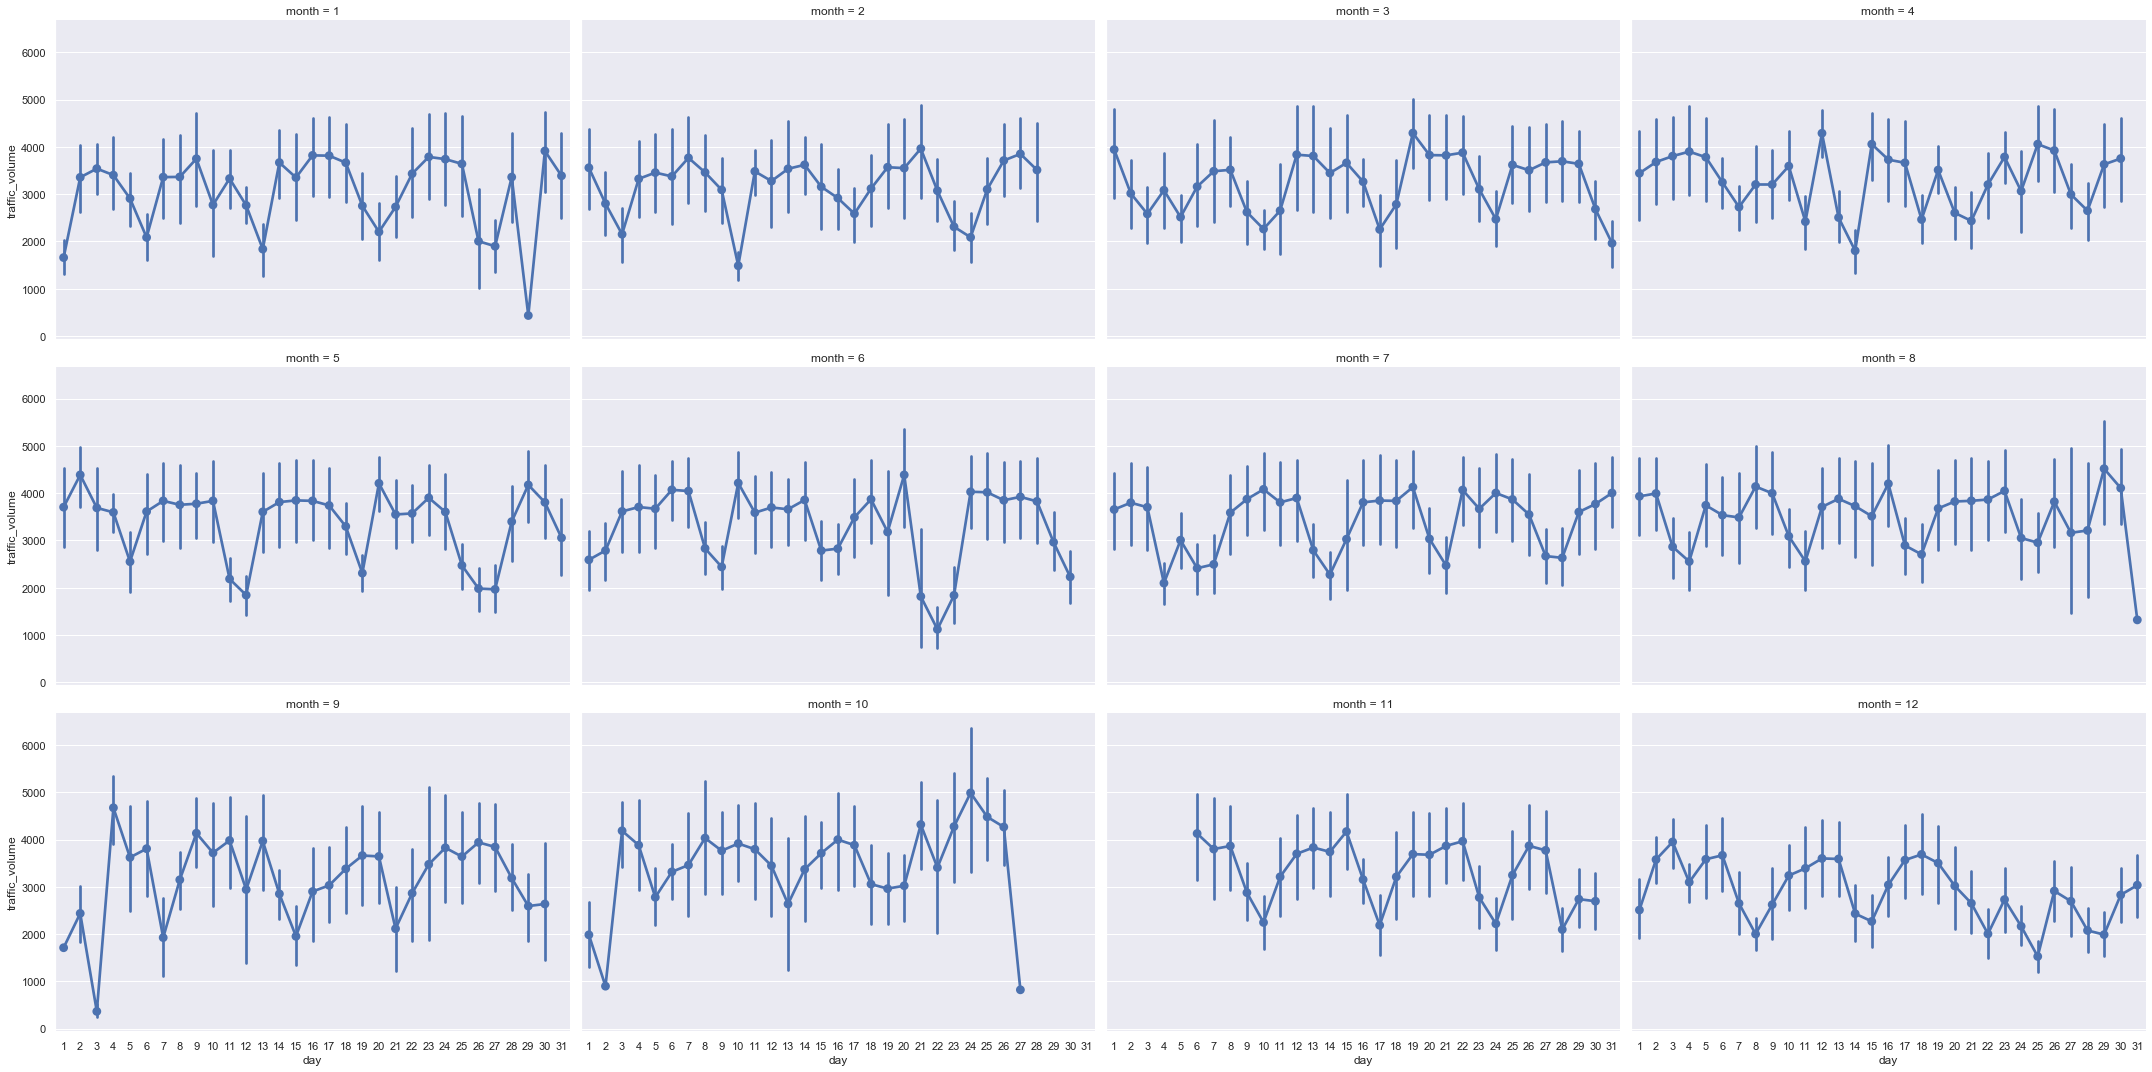

In [3]:
"""Average Traffic Volume per Month"""

sns.catplot(x = 'day', y = 'traffic_volume', col = 'month', data = df, kind = 'point', aspect = 1.5, col_wrap = 4)

"""The average traffic volume follows a relatively similar pattern in accordance to day and the difference outside
of the pattern is easily seeable for example during September and october where the error bars are longer"""

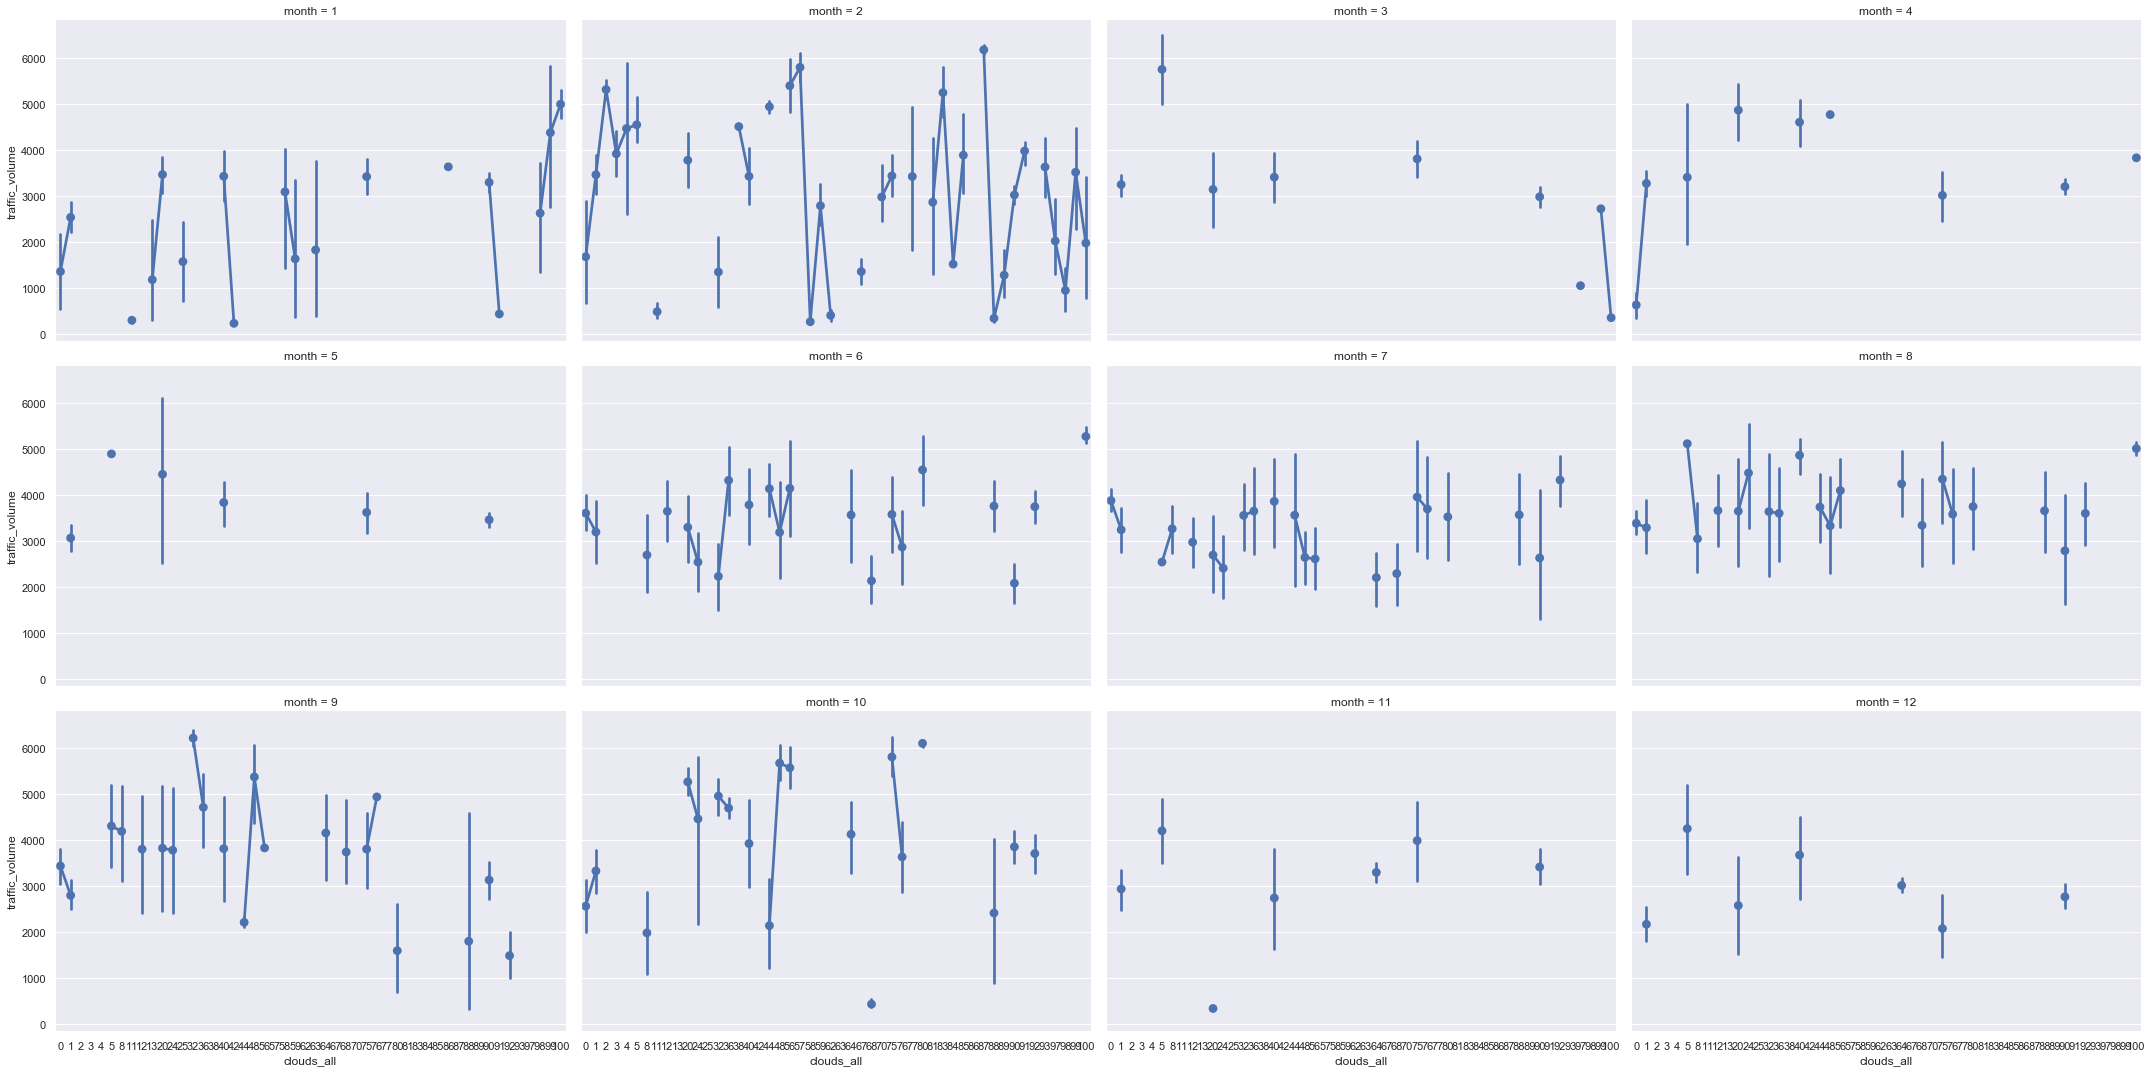

In [4]:
sns.catplot(x = 'clouds_all', y = 'traffic_volume', col = 'month', data = df, kind = 'point', aspect = 1.5, col_wrap = 4)


'Interestingly enough, the traffic volume for time follows a relatively same pattern'

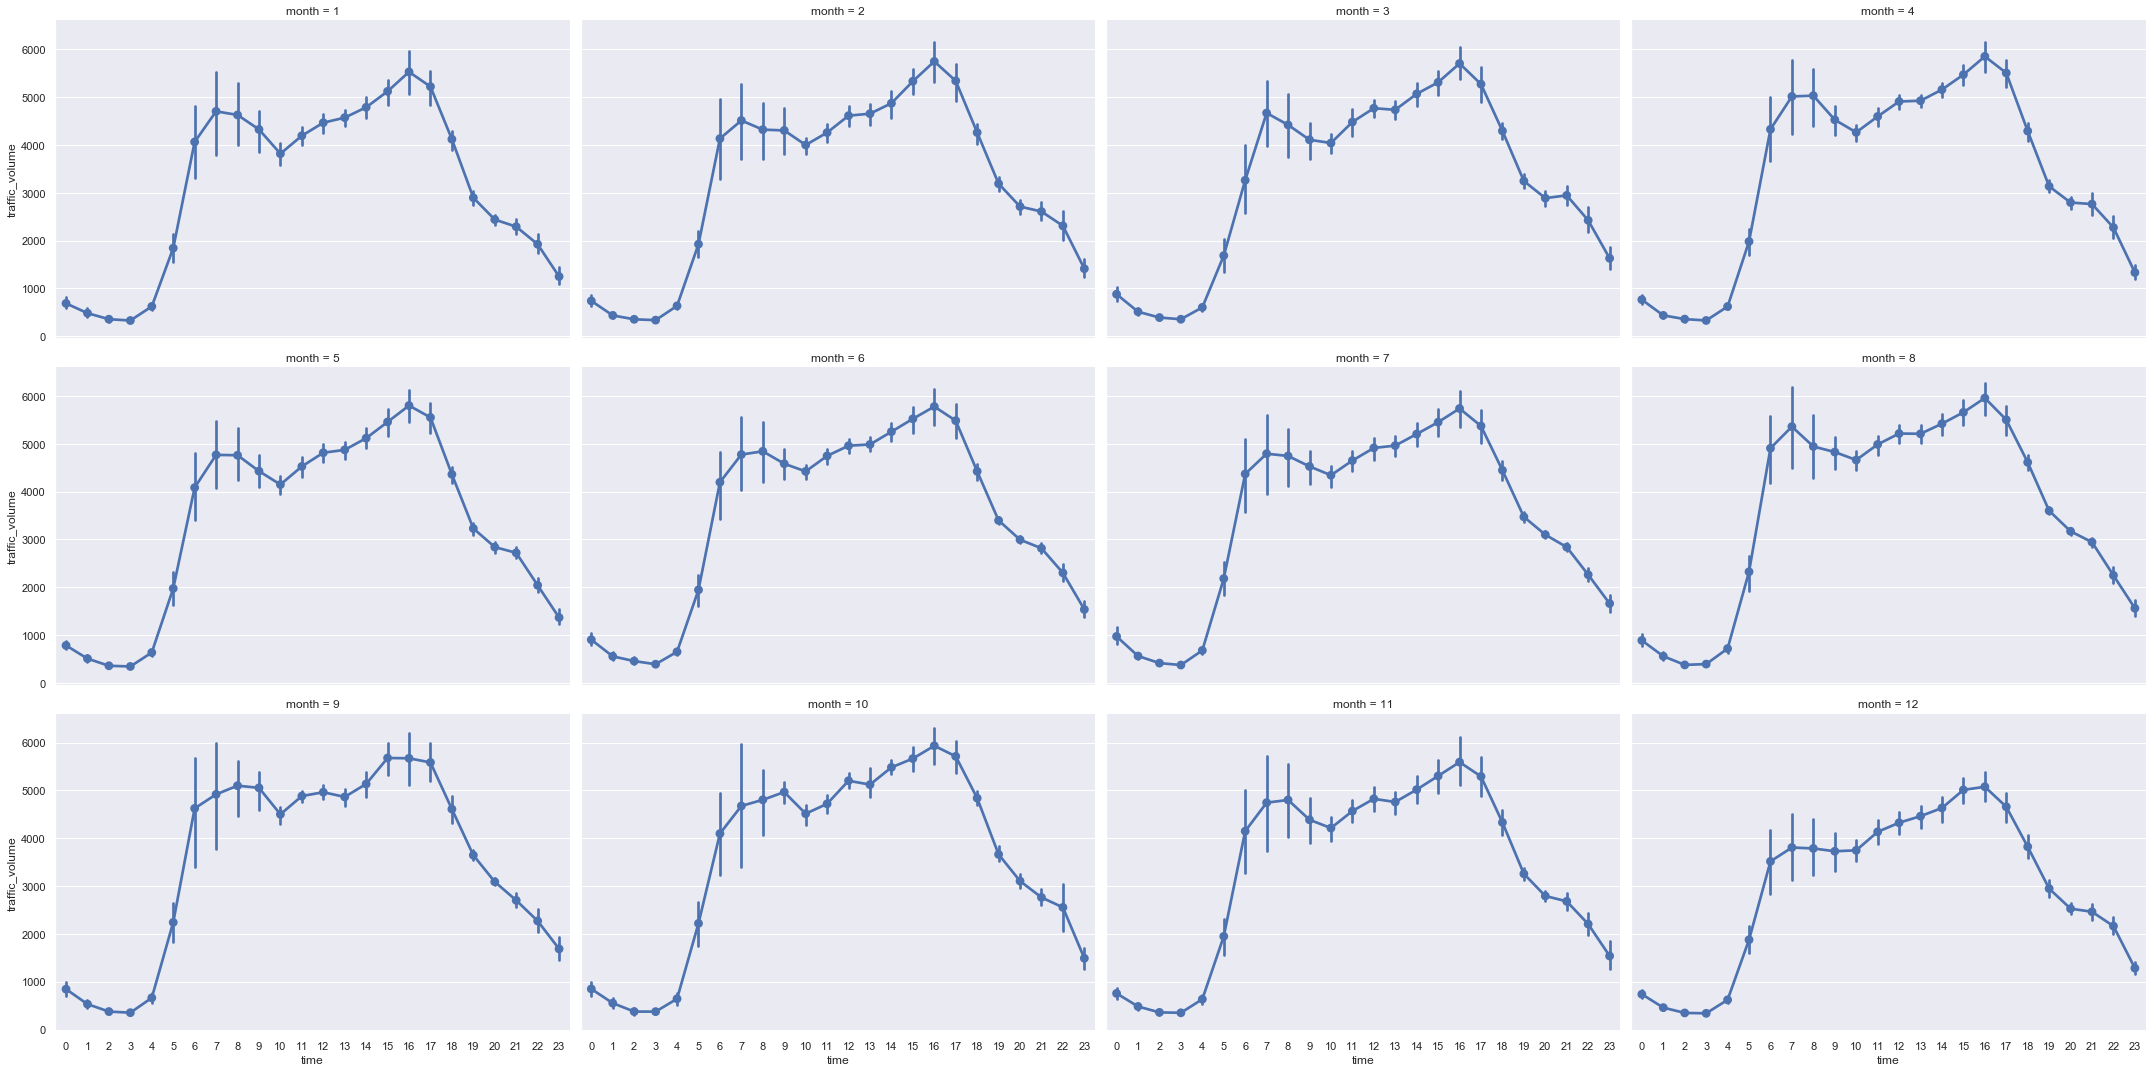

In [5]:
"""Average Traffic Volume per Hour"""

sns.catplot(x = 'time', y = 'traffic_volume', col = 'month', data = df, kind = 'point', aspect = 1.5, col_wrap = 4)

"""Interestingly enough, the traffic volume for time follows a relatively same pattern"""

Text(0.5, 1.0, 'Total Sum of Traffic for Each Main Weather')

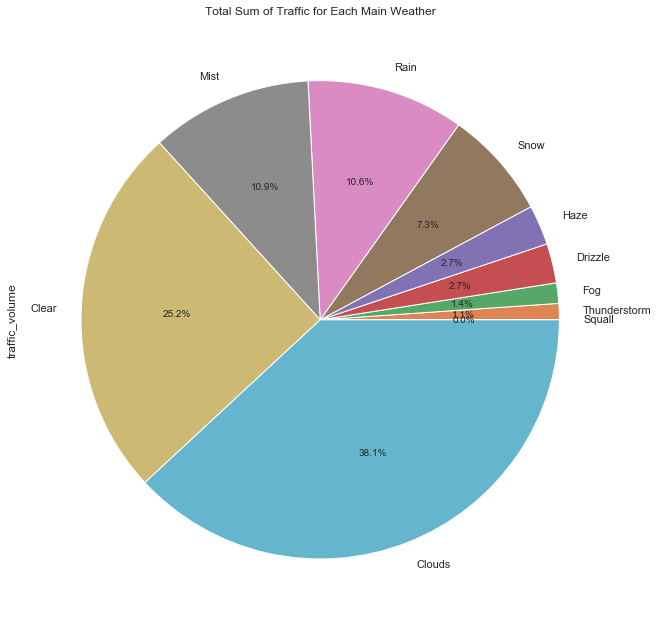

In [6]:
df.groupby('weather_main').traffic_volume.sum().sort_values(ascending = True).plot(kind = 'pie', figsize = (11,11), autopct='%0.1f%%')
plt.title('Total Sum of Traffic for Each Main Weather')

'We can see that the volume of traffic is higher during cloudy and clear days on the above graph if we use the total sum.\nHowever, if we look at the mean traffic, the traffic volume for each weather is relatively similar. Which means that\nthe state of weather has very little say in the traffic volume as people will drive regardless. Although traffic volume\nis significantly smaller during a Squall at 4.4%, while Haze is the highest at 12.5%'

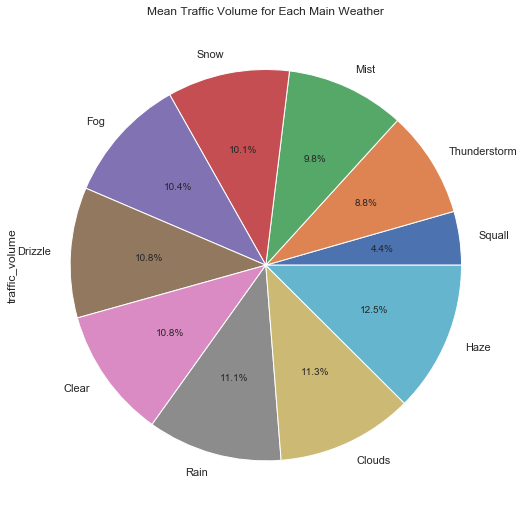

In [7]:
df.groupby('weather_main').traffic_volume.mean().sort_values(ascending = True).plot(kind = 'pie', figsize = (9,9), autopct='%0.1f%%')
plt.title('Mean Traffic Volume for Each Main Weather')

'''We can see that the volume of traffic is higher during cloudy and clear days on the above graph if we use the total sum.
However, if we look at the mean traffic, the traffic volume for each weather is relatively similar. Which means that
the state of weather has very little say in the traffic volume as people will drive regardless. Although traffic volume
is significantly smaller during a Squall at 4.4%, while Haze is the highest at 12.5%'''

Text(0.5, 1.0, 'Mean Traffic Volume for Each Weather Description')

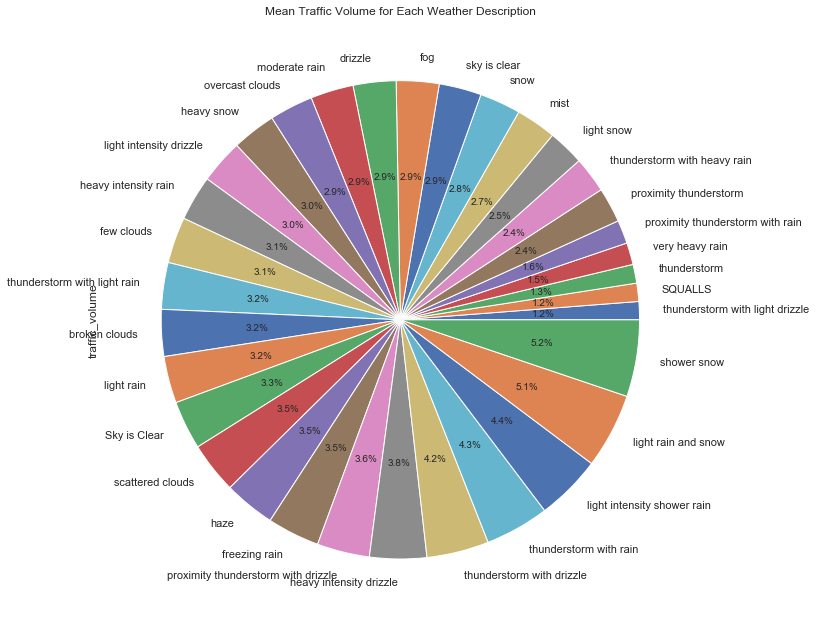

In [8]:
df.groupby('weather_description').traffic_volume.mean().sort_values(ascending = True).plot(kind = 'pie', figsize = (11,11), autopct='%0.1f%%')
plt.title('Mean Traffic Volume for Each Weather Description')

'While most days are normal days, there is a significant '

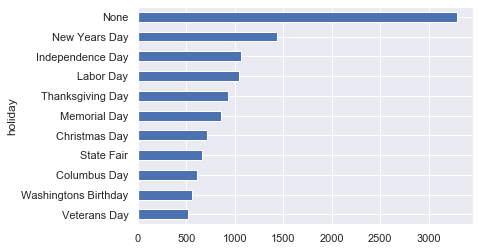

In [9]:
df.groupby('holiday').traffic_volume.mean().sort_values(ascending = True).plot(kind = 'barh')

"""While most days are normal days, there is a significant difference in traffic volume between each holiday"""

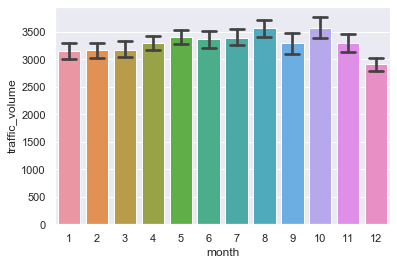

In [10]:
sns.barplot(df.month, df.traffic_volume, capsize = 0.5)

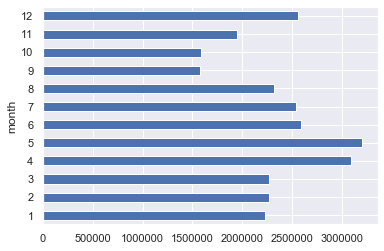

In [11]:
df.groupby(df.month).traffic_volume.sum().plot(kind = 'barh')

'Rain only happened during June to Dec, with a sharp decline in Sept and Nov'

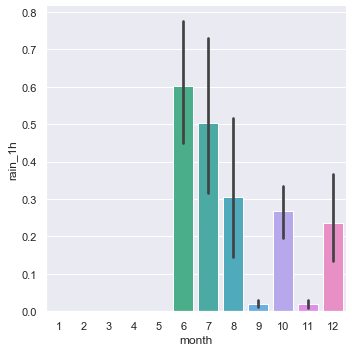

In [12]:
sns.catplot(x = 'month', y = 'rain_1h', data = df, kind = 'bar')

"""Rain only happened during June to Dec, with a sharp decline in Sept and Nov"""

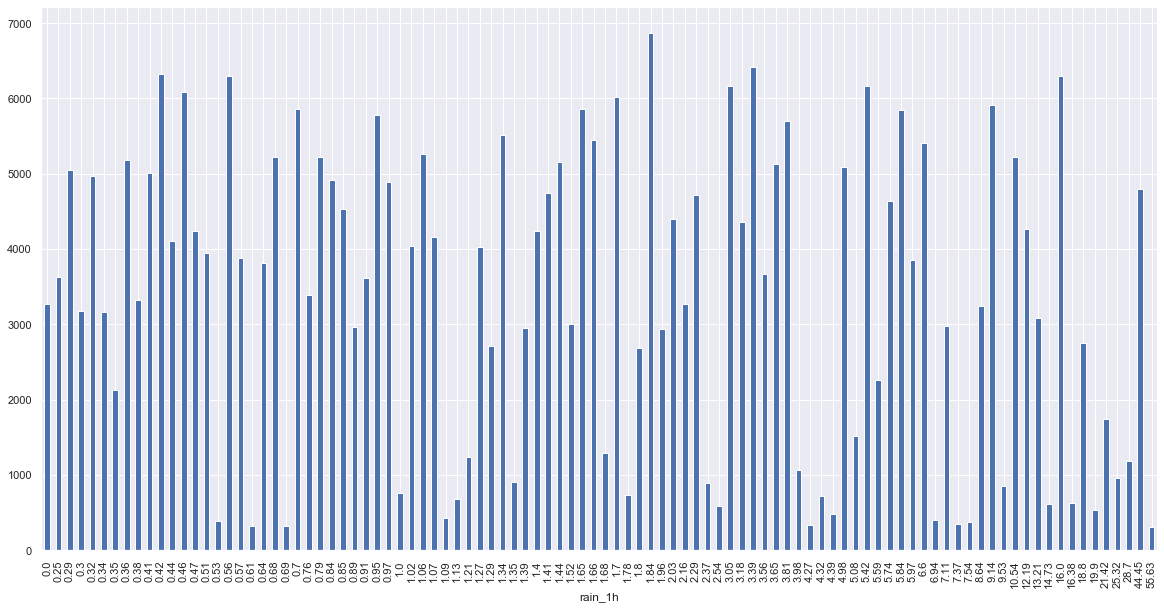

'rain_1h at first glance does not seem to be a good feature to be used later in the machine learning either.\nThe volume of traffic with no rainfall is less than the 2nd highest rainfall. Everything seems random with no\nclear patterns. \n\nHowever, if we were to look at the total sum of traffic per rainfall, no rain has the highest \nvolume of traffic'

In [13]:
df.groupby('rain_1h').traffic_volume.mean().plot(kind = 'bar', figsize = (20,10))
plt.show()

"""rain_1h at first glance does not seem to be a good feature to be used later in the machine learning either.
The volume of traffic with no rainfall is less than the 2nd highest rainfall. Everything seems random with no
clear patterns. 

However, if we were to look at the total sum of traffic per rainfall, no rain has the highest 
volume of traffic"""

'What is interesting is that there is no Snow fall even though there is a snow category in weather_main\nand weather_description. Snow_1h will not be a good feature to be used for the machine learning later on'

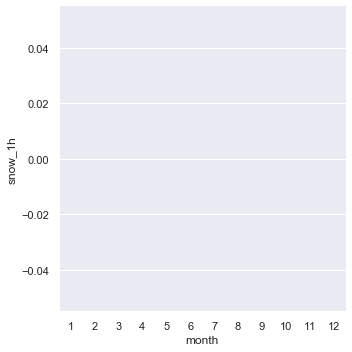

In [14]:
sns.catplot(x = 'month', y = 'snow_1h', data = df, kind = 'bar')

"""What is interesting is that there is no Snow fall even though there is a snow category in weather_main
and weather_description. Snow_1h will not be a good feature to be used for the machine learning later on"""

After going through the data set, I can infer that the features temp, rain_1h, snow_1h & clouds_all may not be a good features to be used later in the machine learning alogrithm as they can already be explained with the feature Main Weather.

With this data set, a traffic volume predictor can be created with a multiple feature linear regression